# Introduction to TSR distance estimation

In [1]:
from __future__ import print_function, division
import pandas as pd
from meye import MEImage
%pylab inline
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


## Reading the database


In [2]:
df = pd.read_pickle("store.pickle")
df.head()

,Z,currImage,currRect,egoMotion,focal,prevImage,prevRect
0,13.85,16-06-05_17-25-17_Single_0026_frame52.img,"[117, 202, 650, 736]","[[0.999999578399109, -0.000895476002401953, -0...",1612,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]"
1,16.7,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]","[[0.9999966311214874, -0.0025956984235227477, ...",1612,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]"
2,None,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]","[[0.9999998869381259, 0.00046968847719411973, ...",1612,16-06-05_17-25-17_Single_0026_frame49.img,"[299, 351, 605, 659]"


[299, 351, 605, 659]


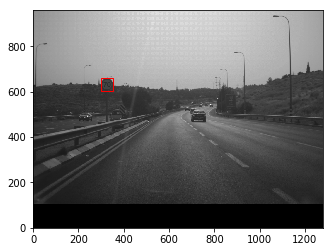

In [3]:
import matplotlib.patches as patches
path = df.iloc[2].prevImage
rect = df.iloc[2].prevRect
path1 = df.iloc[2].currImage
rect1 = df.iloc[2].currRect
egoMotion = df.egoMotion[2][:3,:3]
tegomotion =df.egoMotion[2][:3,3:]

images = MEImage.from_file(path)

plt.imshow(images.im,cmap='gray',origin='lower')

print(rect)

rectH = patches.Rectangle(rect[::2],rect[1]-rect[0],rect[3]-rect[2],linewidth=1,edgecolor='r',facecolor='none')
gca().add_patch(rectH)

[299, 351, 605, 659]


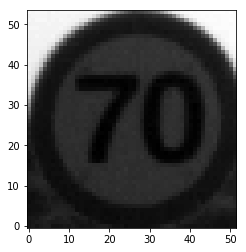

In [4]:
images = MEImage.from_file(path)
print(rect)
simage = images.im[rect[2]:rect[3],rect[0]:rect[1]]
plt.imshow(simage,cmap='gray',origin='lower')


In [5]:
print(simage.shape)
sobel_kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])/8
sobel_kernely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])/8
from scipy import signal as sg
from scipy.ndimage.filters import maximum_filter,gaussian_filter
ix = sg.convolve2d(simage, sobel_kernelx, "same") 
iy = sg.convolve2d(simage, sobel_kernely, "same") 

iy2 = iy**2
ix2 = ix**2
ixy = ix*iy


(54, 52)


[ 1  1  1 13 16 17 18 34 38 50 50 50] [ 1 36 52 35 17 52 17 20 52  1 41 52]


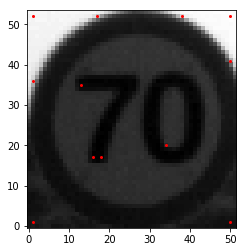

In [6]:
h , w = simage.shape
r = np.zeros((h, w))
result =np.zeros((h,w))
rmax = 0 
sx2 = sg.convolve2d(ix2, np.ones((3,3)), "same") 
sy2 = sg.convolve2d(iy2, np.ones((3,3)), "same") 
sxy = sg.convolve2d(ixy, np.ones((3,3)), "same") 
for i in range(h):
        for j in range(w):
            m = np.array([[sx2[i, j], sxy[i, j]], [sxy[i, j], sy2[i, j]]], dtype=np.float64)
            r[i, j] = 2*np.linalg.det(m)/ np.trace(m)
            if r[i,j] > rmax:
                rmax = r[i, j]
for i in range(h - 1):
        for j in range(w - 1):
            if   r[i, j] > rmax * 0.01 and r[i, j] > r[i - 1, j - 1] and r[i, j] > r[i, j + 1] and r[i, j] > r[i + 1, j] and r[i, j] > r[i - 1, j] and r[i, j] > r[i, j - 1]and r[i, j] > r[i - 1, j + 1] and r[i, j] > r[i + 1, j - 1] and r[i, j] > r[i + 1, j + 1]:
                result[i, j] = 1
result = np.transpose(result)
pc, pr = np.where(result == 1)
plt.imshow(simage,cmap='gray',origin='lower')
plt.plot(pc,pr, 'r',linestyle="None", marker="o", markersize=2)
print(pc,pr)
X1 = w
Y1 = h

[257, 317, 615, 677]


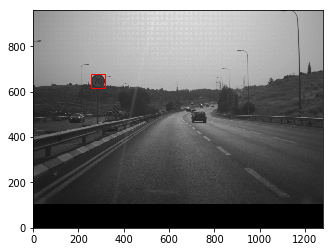

In [7]:
images = MEImage.from_file(path1)

plt.imshow(images.im,cmap='gray',origin='lower')

print(rect1)

recte = patches.Rectangle(rect1[::2],rect1[1]-rect1[0],rect1[3]-rect1[2],linewidth=1,edgecolor='r',facecolor='none')
gca().add_patch(recte)

[257, 317, 615, 677]


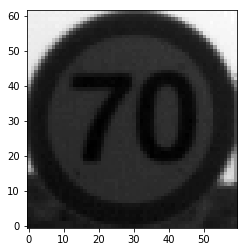

In [8]:
images = MEImage.from_file(path1)


# plt.plot(*image.origin[::-1], marker='+', markersize=10, color="red
print(rect1)

simage = images.im[rect1[2]:rect1[3],rect1[0]:rect1[1]]
plt.imshow(simage,cmap='gray',origin='lower')

In [9]:
print(simage.shape)
sobel_kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])/8
sobel_kernely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])/8
from scipy import signal as sg
from scipy.ndimage.filters import maximum_filter,gaussian_filter
ix = sg.convolve2d(simage, sobel_kernelx, "same") 
iy = sg.convolve2d(simage, sobel_kernely, "same") 

iy2 = iy**2
ix2 = ix**2
ixy = ix*iy
sobel_kernely

(62, 60)


array([[ 0.125,  0.25 ,  0.125],
       [ 0.   ,  0.   ,  0.   ],
       [-0.125, -0.25 , -0.125]])

[ 1  1  1  1  1 13 16 19 22 41 56 58 58 58 58 58] [ 1 15 18 44 60 40 19 60 38 60 13  1 13 20 42 60]


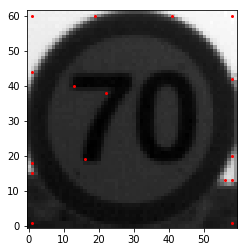

In [10]:
h , w = simage.shape

r = np.zeros((h, w))
result =np.zeros((h, w))
rmax = 0 
sx2 = sg.convolve2d(ix2, np.ones((3,3)), "same") 
sy2 = sg.convolve2d(iy2, np.ones((3,3)), "same") 
sxy = sg.convolve2d(ixy, np.ones((3,3)), "same") 
for i in range(h):
        for j in range(w):
            m = np.array([[sx2[i, j], sxy[i, j]], [sxy[i, j], sy2[i, j]]], dtype=np.float64)
            r[i, j] = 2*np.linalg.det(m)/ np.trace(m)
            if r[i,j] > rmax:
                rmax = r[i, j]
for i in range(h - 1):
        for j in range(w - 1):
            if   r[i, j] > rmax * 0.01 and r[i, j] > r[i - 1, j - 1] and r[i, j] > r[i, j + 1] and r[i, j] > r[i + 1, j] and r[i, j] > r[i - 1, j] and r[i, j] > r[i, j - 1]and r[i, j] > r[i - 1, j + 1] and r[i, j] > r[i + 1, j - 1] and r[i, j] > r[i + 1, j + 1]:
                result[i, j] = 1
result = np.transpose(result)
pc1, pr1 = np.where(result == 1)
plt.imshow(simage,cmap='gray',origin='lower')
plt.plot(pc1,pr1, 'r',linestyle="None", marker="o", markersize=2)
print(pc1,pr1)
X2 = w
Y2 = h

In [11]:

xes = pc
yes =  pr
xes1 = pc1
yes1 =  pr1
maching = []
for x,y in zip(xes,yes):
    difx = format(x/X1 , '.1f')
    dify = format(y/Y1 , '.1f')
    for x1,y1 in zip(xes1,yes1):
        difx1 =  format(x1/X2 , '.1f')
        dify1 =  format(y1/Y2 , '.1f')
        if difx == difx1 and dify == dify1:
            maching.append((x,y,x1,y1))
            


In [12]:
mz = 0 
image = MEImage.from_file(path)
o1,o2 = image.origin
print(o1,o2)
for x in maching:
    xprev = x[0] + rect[0] - o1
    yprev = x[1] + rect[2] - o2
    xcurr = x[2] + rect1[0] - o1
    ycurr = x[3] +  rect1[2] - o2
    pcruunt= np.dot(egoMotion,[xprev,yprev, df.focal[0]]) 
    ex = df.focal[0]*tegomotion[0]/tegomotion[2]
    z = (tegomotion[2]*( df.focal[0]*pcruunt[0]/pcruunt[2] - ex))/(df.focal[0]*pcruunt[0]/pcruunt[2] - xcurr)
    mz+=z

    
mz/len(maching)

612 508


array([18.66564852])

In [13]:
pcruunt= np.dot(egoMotion,[xprev,yprev, df.focal[0]]) 
ex = df.focal[0]*tegomotion[0]/tegomotion[2]
z = (tegomotion[2]*( df.focal[0]*pcruunt[0]/pcruunt[2] - ex))/(df.focal[0]*pcruunt[0]/pcruunt[2] - xcurr)
z

array([19.45701569])